In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import seaborn as sns


In [ ]:
tips=sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.shape

(244, 7)

In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
tips.info()
tips.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


(244, 7)

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

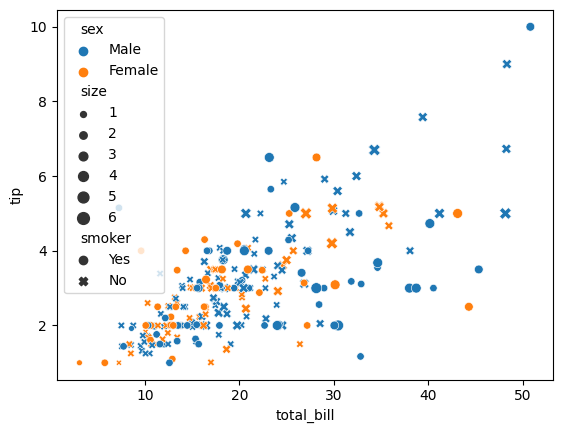

In [ ]:
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex'],style=tips['smoker'],size=tips['size'])

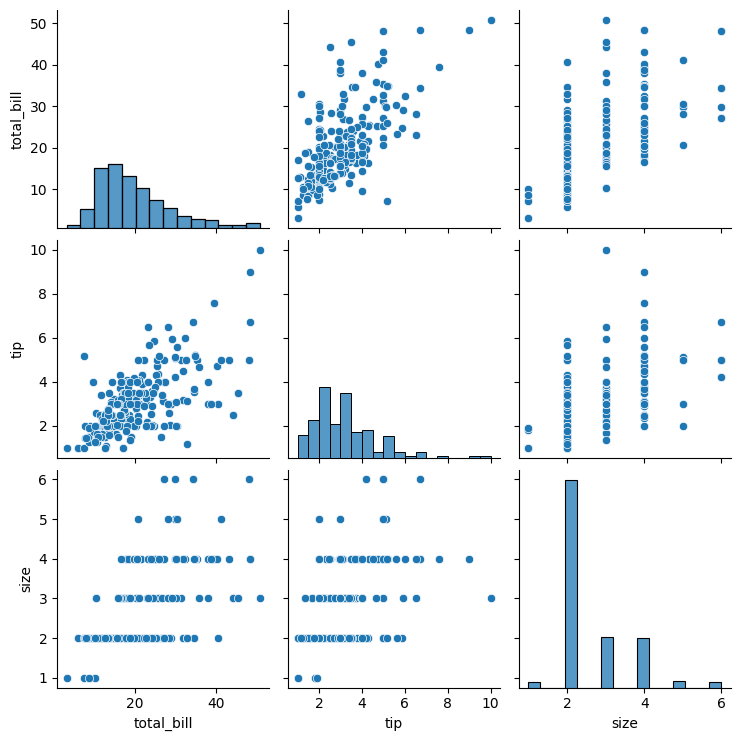

In [ ]:
sns.pairplot(tips)

<Axes: xlabel='total_bill', ylabel='tip'>

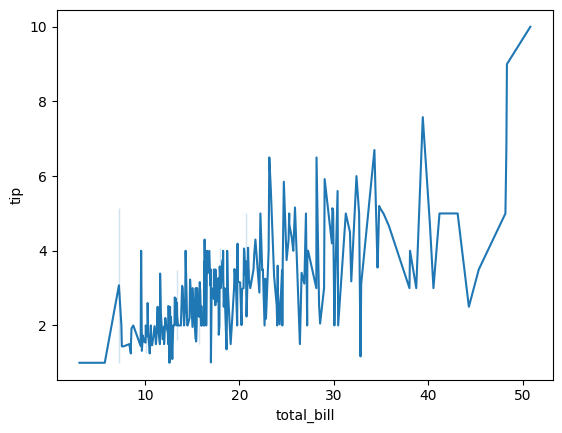

In [ ]:
sns.lineplot(x=tips['total_bill'],y= tips['tip'])

<Axes: xlabel='tip', ylabel='total_bill'>

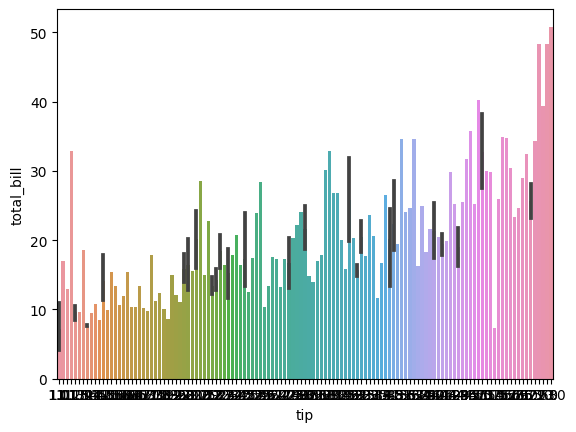

In [ ]:
sns.barplot(data=tips, x='tip', y='total_bill')

<Axes: >

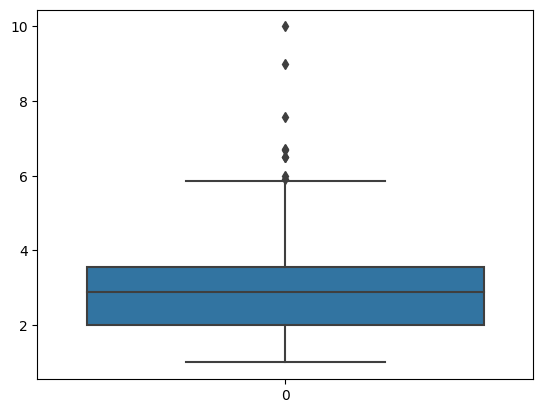

In [ ]:
sns.boxplot(tips['tip'])

In [ ]:
for i in range(len(tips['tip'])):
  if tips['tip'][i]>6:
    tips['tip'][i]=tips['tip'].mean()

<Axes: >

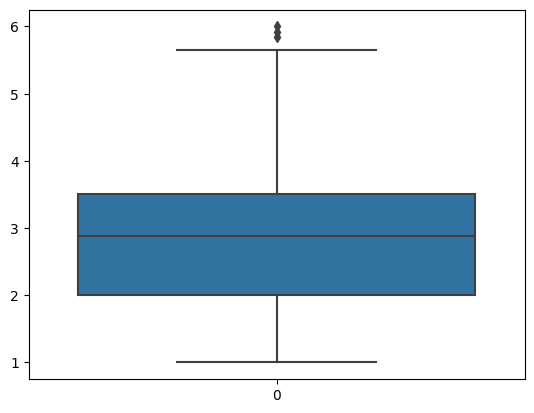

In [ ]:
sns.boxplot(tips['tip'])

In [ ]:
tips['tip'][0]

1.01

<Axes: xlabel='tip', ylabel='Density'>

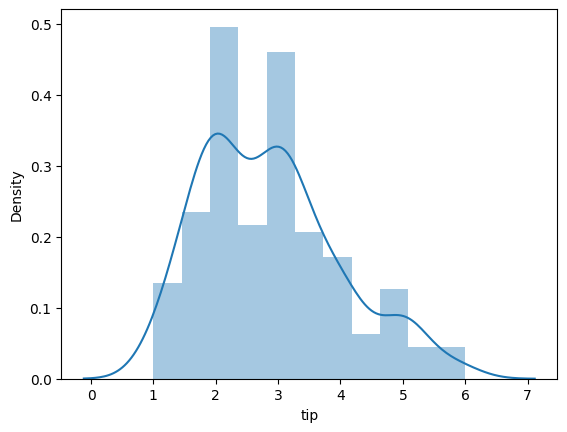

In [ ]:
sns.distplot(tips['tip'])

In [ ]:
# df=pd.read_csv('titanic.csv')

In [ ]:
df=pd.read_csv('https://github.com/campusx-official/100-days-of-machine-learning/raw/main/day24-standardization/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=df.iloc[:,2:]

In [ ]:
df.sample(5)

,Age,EstimatedSalary,Purchased
102,32,86000,0
19,48,29000,1
78,28,87000,0
52,29,83000,0
206,55,130000,1


In [ ]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
X=df.drop('Purchased', axis=1)
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [ ]:
y=df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=786)

In [ ]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [ ]:
X_train.shape[0]

320

In [ ]:
X, y

(     Age  EstimatedSalary
 0     19            19000
 1     35            20000
 2     26            43000
 3     27            57000
 4     19            76000
 ..   ...              ...
 395   46            41000
 396   51            23000
 397   50            20000
 398   36            33000
 399   49            36000
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
ss.fit(X_train)

StandardScaler()

In [ ]:
X_train_new=ss.transform(X_train) #returns a numpy array
X_test_new=ss.transform(X_test)

In [ ]:
X_train, X_train_new #(df, np.array())

(     Age  EstimatedSalary
 40    27            17000
 167   35            71000
 164   33            69000
 371   60            83000
 185   31            66000
 ..   ...              ...
 103   33           149000
 363   42            79000
 202   39           134000
 215   60           108000
 286   37            62000
 
 [320 rows x 2 columns],
 array([[-1.01121896, -1.51684016],
        [-0.25780786,  0.02335246],
        [-0.44616063, -0.03369171],
        [ 2.09660182,  0.36561748],
        [-0.63451341, -0.11925797],
        [ 0.30725046, -0.51856717],
        [ 0.7781324 ,  0.50822791],
        [-1.48210089, -0.43300091],
        [-0.25780786, -0.2618684 ],
        [-1.67045367,  0.3370954 ],
        [-1.85880644,  0.45118374],
        [-0.35198425,  1.19275797],
        [-0.25780786, -1.28866348],
        [-0.25780786, -0.91787637],
        [ 2.09660182, -0.80378802],
        [-0.44616063, -0.29039048],
        [ 0.21307408, -0.2618684 ],
        [-0.25780786,  0.05187454],
 

In [ ]:
ss.mean_

array([3.773750e+01, 7.018125e+04])

In [ ]:
X_train_new=pd.DataFrame(X_train_new, columns=X_train.columns)
X_test_new=pd.DataFrame(X_test_new, columns=X_test.columns)

In [ ]:
X_test_new

,Age,EstimatedSalary
0,1.060662,-0.889354
1,-0.069455,1.905810
2,1.531543,0.964581
3,-1.293748,0.536750
4,-1.482101,-0.204824
...,...,...
75,-0.257808,-1.431274
76,-1.387925,-1.431274
77,0.307250,0.051875
78,0.401427,0.280051


In [ ]:
np.round(X_train.describe())

,Age,EstimatedSalary
count,320.0,320.0
mean,38.0,70181.0
std,11.0,35115.0
min,18.0,15000.0
25%,30.0,42750.0
50%,37.0,70000.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(X_train_new.describe())

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,1.0
max,2.0,2.0


In [ ]:
#notice- mean=0, std=1

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
lr_new=LogisticRegression()

In [ ]:
lr.fit(X_train, y_train )
lr_new.fit(X_train_new, y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)
y_pred_new=lr_new.predict(X_test_new)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy before scaling: ", accuracy_score(y_test, y_pred)*100,'%')
print("Accuracy after scaling: ", accuracy_score(y_test, y_pred_new)*100,'%')

Accuracy before scaling:  70.0 %
Accuracy after scaling:  86.25 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()
dt_new=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)
dt_new.fit(X_train_new, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(X_test)
y_pred_new=dt_new.predict(X_test_new)

In [ ]:
print("Accuracy before scaling: ", accuracy_score(y_test, y_pred)*100,'%')
print("Accuracy after scaling: ", accuracy_score(y_test, y_pred_new)*100,'%')

Accuracy before scaling:  87.5 %
Accuracy after scaling:  86.25 %


In [ ]:
# No change in accuracy in case of decision tree